In [2]:
import numpy as np
import dataframe as df
from keras import *
from keras.layers import *
from keras.regularizers import *
from keras.datasets import *
from keras.models import *
from keras.optimizers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


MSE performs much better than MAE in autoencoders. They also can achieve very low loss. 
Instad of softmax use sigmoid for better visualization of the decoded image.

In [33]:
MSE performs much better than MAE in autoencoders. They also can achieve very low loss. 
Instad of softmax use sigmoid for better visualization of the decoded image.

SyntaxError: invalid syntax (<ipython-input-33-e5dc56210d5a>, line 1)

In [30]:
history = autoencoder.fit(x_train,x_train, batch_size = 128, epochs = 20 , verbose = 1 , validation_split=0.1 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 38us/step - loss: 0.0469 - val_loss: 0.0240
Epoch 2/20
54000/54000 [==============================] - 2s 37us/step - loss: 0.0185 - val_loss: 0.0141
Epoch 3/20
54000/54000 [==============================] - 2s 40us/step - loss: 0.0118 - val_loss: 0.0098
Epoch 4/20
54000/54000 [==============================] - 2s 38us/step - loss: 0.0085 - val_loss: 0.0075
Epoch 5/20
54000/54000 [==============================] - 2s 37us/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.0057 - val_loss: 0.0055
Epoch 7/20
54000/54000 [==============================] - 2s 37us/step - loss: 0.0052 - val_loss: 0.0051
Epoch 8/20
54000/54000 [==============================] - 2s 39us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 9/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 

In [31]:
decoded_imgs = autoencoder.predict(x_test)

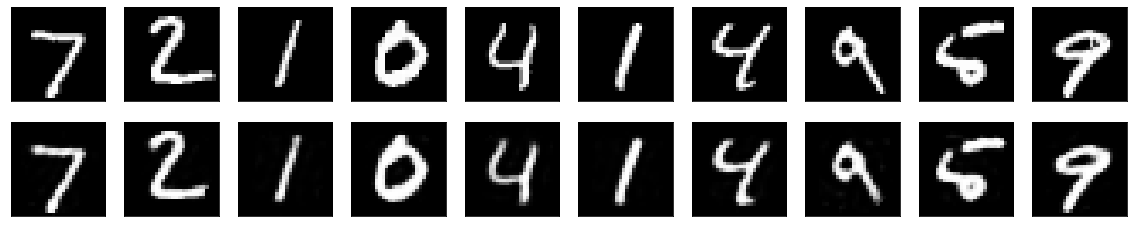

In [32]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Multilayer Autoencoders

In [49]:
input_size = 784
hidden_size_1 = 128
hidden_size_2 = 64
output_size = 784

#encoders
x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation = 'relu')(x)
hidden_2 = Dense(hidden_size_2, activation = 'relu')(hidden_1)

#decoders
hidden_3 = Dense(hidden_size_1, activation = 'relu')(hidden_2)
output = Dense(output_size, activation = 'sigmoid')(hidden_3)

multi_ae = Model(input = x, output = output)
multi_ae.compile(optimizer = 'adam', loss = 'mae')


/home/aminul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [ ]:
history = multi_ae.fit(x_train,x_train, epochs = 100, batch_size = 128, verbose = 1, validation_split=0.1 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 54us/step - loss: 0.0652 - val_loss: 0.0648
Epoch 2/100
54000/54000 [==============================] - 3s 52us/step - loss: 0.0644 - val_loss: 0.0644
Epoch 3/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.0638 - val_loss: 0.0635
Epoch 4/100
54000/54000 [==============================] - 3s 58us/step - loss: 0.0632 - val_loss: 0.0631
Epoch 5/100
54000/54000 [==============================] - 3s 57us/step - loss: 0.0630 - val_loss: 0.0630
Epoch 6/100
54000/54000 [==============================] - 3s 59us/step - loss: 0.0623 - val_loss: 0.0616
Epoch 7/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.0613 - val_loss: 0.0613
Epoch 8/100
54000/54000 [==============================] - 3s 59us/step - loss: 0.0610 - val_loss: 0.0605
Epoch 9/100
54000/54000 [==============================] - 3s 57us/step - loss: 0.0605 - val_loss: 0.06

In [ ]:
decoded_imgs = multi_ae.predict(x_test)

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()